# LIBRERIAS

In [2]:
# Librerias EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
import json
from pickle import dump

# Librerias ML

from sklearn.linear_model import LinearRegression, Lasso, ElasticNetCV, Ridge

from sklearn.metrics import mean_squared_error, r2_score

# PASO 1: Planteamiento del problema y Recopilación de Datos.

##### PLANTEAMIENTO DEL PROBLEMA:

- Queremos saber la relación entre los datos socio demograficos y los recursos de salud.


##### RECOPILACION DE DATOS:

In [3]:
#Recopilamos datos
data_url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
sep = (",")

def DataCompiler(url, sep):
    data = pd.read_csv(url, sep = sep)

    #Guardamos el csv en local
    data.to_csv("../data/raw/raw_data.csv", sep=";")

    return data

data = DataCompiler(data_url, sep)

data

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


# PASO 2: Exploración y Limpieza de Datos.

- #### Obtener dimensiones del dataset

In [4]:
#Obtenemos informacion sobre el dataset

def DataInfo(dataset):
    print(f"Dataset dimensions: {dataset.shape}")
    print(f"\nDataset information:\n{dataset.info()}")
    print(f"\nDataset nan-values: {dataset.isna().sum().sort_values(ascending=False)}")
    

DataInfo (data)

Dataset dimensions: (3140, 108)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB

Dataset information:
None

Dataset nan-values: fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64


##### CONCLUSIONES:

- Dimensiones: 3140, 108
- Valores nulos: Sin valores nulos.
- Tipo de datos: 61 columnas tipo float, 45 columnas tipo int y 2 columnas tipo object.

- #### Eliminacion de Duplicados

In [5]:
#Funcion para eliminar duplicados

#Columna identificadora del Dataset.

def EraseDuplicates(dataset):
    older_shape = dataset.shape
    id = "fips"
    
    if ("id" in locals()):
        dataset.drop(id , axis = 1, inplace = True)
                     
    if (dataset.duplicated().sum()):
        print(f"Total number of duplicates {dataset.duplicated().sum()}")
        print ("Erase duplicates...")
        dataset.drop_duplicates(inplace = True)
    else:
        print ("No coincidences.")
        pass
    
    print (f"The older dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    
    return dataset

data = EraseDuplicates(data)


No coincidences.
The older dimension of dataset is (3140, 108), and the new dimension is (3140, 107).


- #### Eliminacion de datos irrelevantes.

In [6]:
#Quierlo eliminar todos los datos que sean porcentajes
percent_data = []
columns = data.columns

for i in columns:
    if ("%" in str(i) or "Percent" in str(i) or "PCT" in str(i)):
        percent_data.append(i)



#Tambien quiero quitar todos los rates.
r_data = []

for i in columns:
    if("R" in str(i)):
        r_data.append(i)

r_data

#No quiero las prevalence, solo los numeros totales.
prevalence_data = []

for i in columns:
    if("prevalence" in str(i)):
        prevalence_data.append(i)

prevalence_data

#Tampoco quiero los AAMC
AAMC_data = []
for i in columns:
    if("AAMC" in str(i)):
        AAMC_data.append(i)

AAMC_data

#Los nombres no interesan si hay un FIP
names_data = []

for i in columns:
    if("NAME" in str(i)):
        names_data.append(i)

names_data

['COUNTY_NAME', 'STATE_NAME']

In [7]:
#Funcion para eliminar datos irrelevantes.

def EraseIrrelevants(dataset, lst):
    older_shape = data.shape
    print("Erase irrelevant´s dates...")
    dataset.drop(lst, axis = 1, inplace = True)
    print (f"The old dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    return dataset

EraseIrrelevants(data, percent_data)
EraseIrrelevants(data, r_data)
EraseIrrelevants(data, prevalence_data)
EraseIrrelevants(data, AAMC_data)
EraseIrrelevants(data, names_data)
EraseIrrelevants(data, ["POP_ESTIMATE_2018", "N_POP_CHG_2018", "POVALL_2018", "MEDHHINC_2018", "Median_Household_Income_2018", "TOT_POP", "GQ_ESTIMATES_2018", "Total Population", "Population Aged 60+", "STATE_FIPS", "CNTY_FIPS", "county_pop2018_18 and older", "CI90LBINC_2018", "CI90UBINC_2018"])

data.columns

Erase irrelevant´s dates...
The old dimension of dataset is (3140, 107), and the new dimension is (3140, 71).
Erase irrelevant´s dates...
The old dimension of dataset is (3140, 71), and the new dimension is (3140, 65).
Erase irrelevant´s dates...
The old dimension of dataset is (3140, 65), and the new dimension is (3140, 59).
Erase irrelevant´s dates...
The old dimension of dataset is (3140, 59), and the new dimension is (3140, 53).
Erase irrelevant´s dates...
The old dimension of dataset is (3140, 53), and the new dimension is (3140, 51).
Erase irrelevant´s dates...
The old dimension of dataset is (3140, 51), and the new dimension is (3140, 37).


Index(['0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
       '80+', 'White-alone pop', 'Black-alone pop',
       'Native American/American Indian-alone pop', 'Asian-alone pop',
       'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop',
       'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18', 'Civilian_labor_force_2018',
       'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018',
       'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
       'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'ICU Beds_x',
       'anycondition_number', 'Obesity_number', 'Heart disease_number',
       'COPD_number', 'diabetes_number', 'CKD_number', 'Urban_rural_code'],
      dtype='o

In [8]:
#cambiamos el nombre de las columnas de las edades, por mania solamente.

data.rename( columns= {"0-9" : "child", "19-Oct" : "teenager", "20-29" : "young", "30-39" : "adult", "40-49" : "senior", "50-59" : "older_senior", "60-69" : "retired", "70-79" : "elder", "80+" : "late_elder"}, inplace=True)
data.rename( columns={"Less than a high school diploma 2014-18" : "less_highSchool", "High school diploma only 2014-18" : "highSchool", "Some college or associate's degree 2014-18" : "college", "Bachelor's degree or higher 2014-18" : "bachelor"}, inplace=True)
data.rename( columns={"White-alone pop" : "caucasian", "Black-alone pop" : "afrodescendant", "Asian-alone pop" : "asiatic", "Native American/American Indian-alone pop" : "american-native", "Hawaiian/Pacific Islander-alone pop" : "maoli", "Two or more races pop" : "mixted"}, inplace=True)
data.rename( columns={"Family Medicine/General Practice Primary Care (2019)" : "Family_Medicine_General_Practice_Primary_Care(2019)"}, inplace=True)

data.columns

Index(['child', 'teenager', 'young', 'adult', 'senior', 'older_senior',
       'retired', 'elder', 'late_elder', 'caucasian', 'afrodescendant',
       'american-native', 'asiatic', 'maoli', 'mixted', 'less_highSchool',
       'highSchool', 'college', 'bachelor', 'Civilian_labor_force_2018',
       'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018',
       'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
       'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
       'Family_Medicine_General_Practice_Primary_Care(2019)',
       'Total Specialist Physicians (2019)', 'ICU Beds_x',
       'anycondition_number', 'Obesity_number', 'Heart disease_number',
       'COPD_number', 'diabetes_number', 'CKD_number', 'Urban_rural_code'],
      dtype='object')

# PASO 3: Analisis de variables univariantes

- #### Analisis sobre variables categóricas

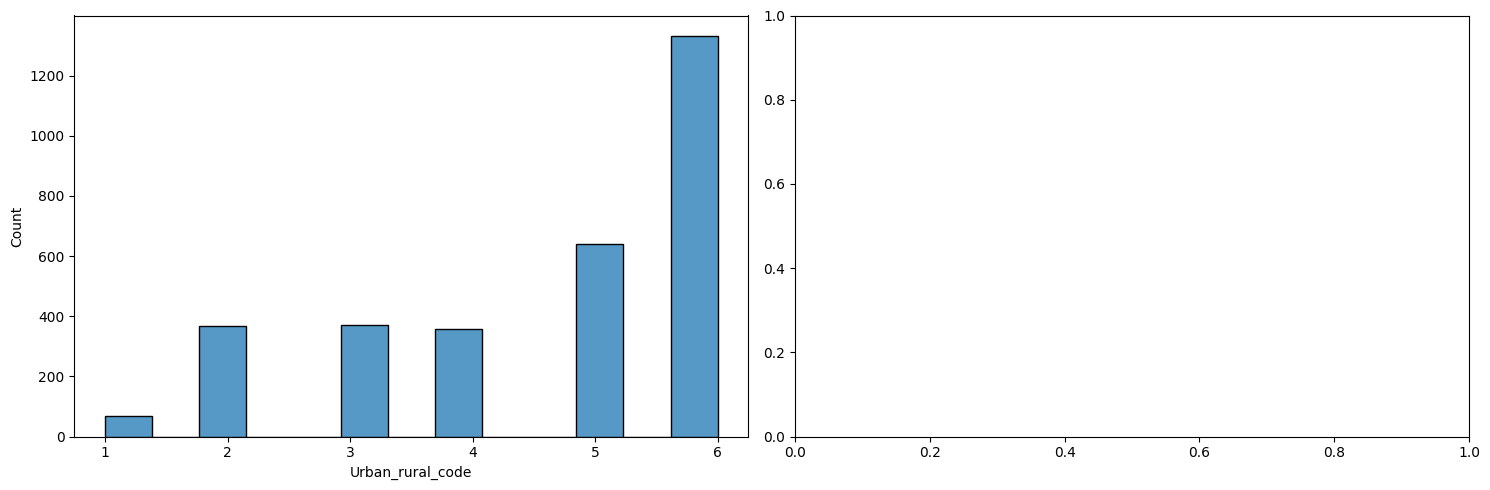

In [9]:
#Analisis sobre variables categoricas

def CategoricGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(1, 2, figsize=(15,5))

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0], data = dataset, x = "Urban_rural_code")
   

    #Mostramos el grafico.
    plt.tight_layout()
    plt.show()

CategoricGraf(data)

#### CONCLUSIONES:


- #### Analisis sobre variables numéricas

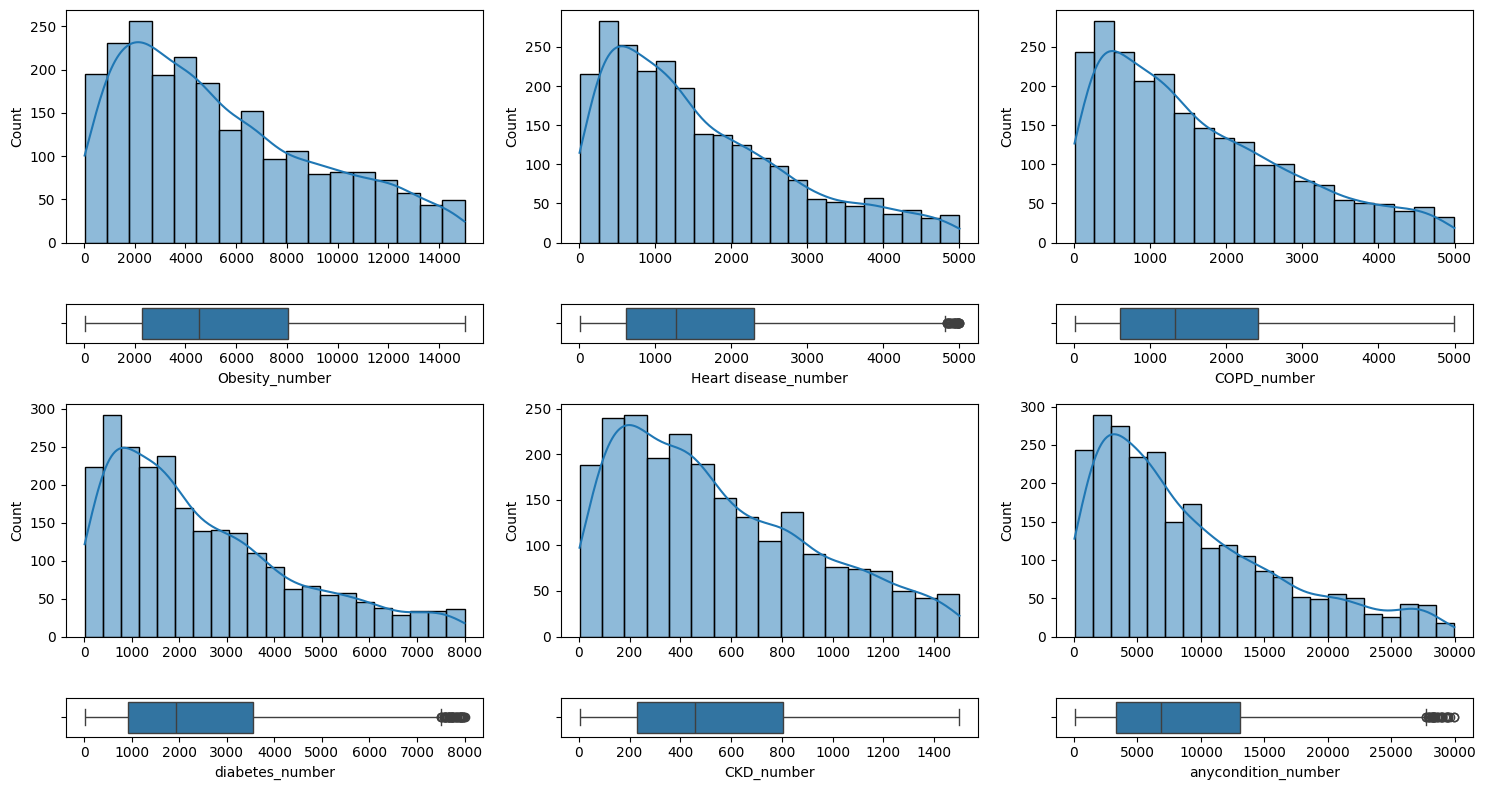

In [10]:
# Analisis sobre variables numericas

def NumericalGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(4, 3, figsize=(15,8), gridspec_kw={"height_ratios" : [6,1,6,1]})

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0,0], data = dataset[dataset["Obesity_number"] <= 15000], x = "Obesity_number", kde = True).set(xlabel = None)
    sns.boxplot( ax = axis[1,0], data = dataset[dataset["Obesity_number"] <= 15000], x = "Obesity_number")
    sns.histplot( ax = axis[0,1], data = dataset[dataset["Heart disease_number"] <= 5000], x = "Heart disease_number", kde = True).set(xlabel = None)
    sns.boxplot( ax = axis[1,1], data = dataset[dataset["Heart disease_number"] <= 5000], x = "Heart disease_number")
    sns.histplot( ax = axis[0,2], data = dataset[dataset["COPD_number"] <= 5000], x = "COPD_number", kde = True).set(xlabel = None)
    sns.boxplot( ax = axis[1,2], data = dataset[dataset["COPD_number"] <= 5000], x = "COPD_number")
    sns.histplot( ax = axis[2,0], data = dataset[dataset["diabetes_number"] <= 8000], x = "diabetes_number", kde = True).set(xlabel = None)
    sns.boxplot( ax = axis[3,0], data = dataset[dataset["diabetes_number"] <= 8000], x = "diabetes_number")
    sns.histplot( ax = axis[2,1], data = dataset[dataset["CKD_number"] <= 1500], x = "CKD_number", kde = True).set(xlabel = None)
    sns.boxplot( ax = axis[3,1], data = dataset[dataset["CKD_number"] <= 1500], x = "CKD_number")
    sns.histplot( ax = axis[2,2], data = dataset[dataset["anycondition_number"] <= 30000], x = "anycondition_number", kde = True).set(xlabel = None)
    sns.boxplot( ax = axis[3,2], data = dataset[dataset["anycondition_number"] <= 30000], x = "anycondition_number")
    
    plt.tight_layout()
    plt.show()

NumericalGraf(data)

##### CONCLUSIONES

- Analizamos las predictoras relacionadas con enfermedades y la target (Heart disease) y nos muestra distribuciones asimétricas positivas.

# PASO 4: Analisis de variable multivariante

- Analisis heart disease (predictores étincos y de nivel educacional) numérico/numérico

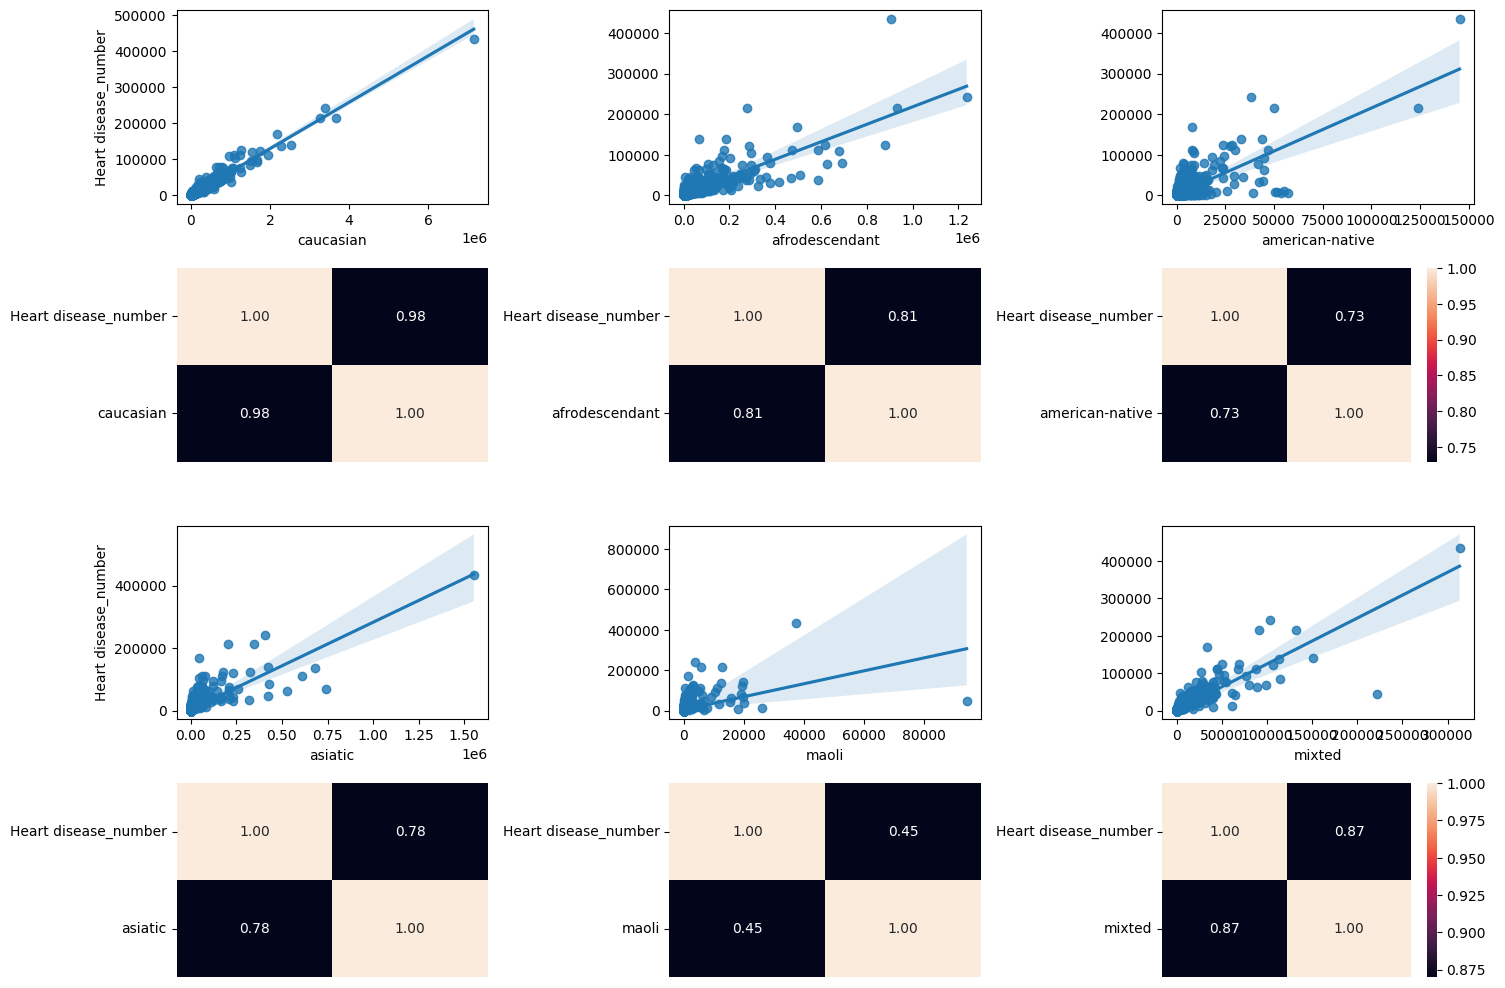

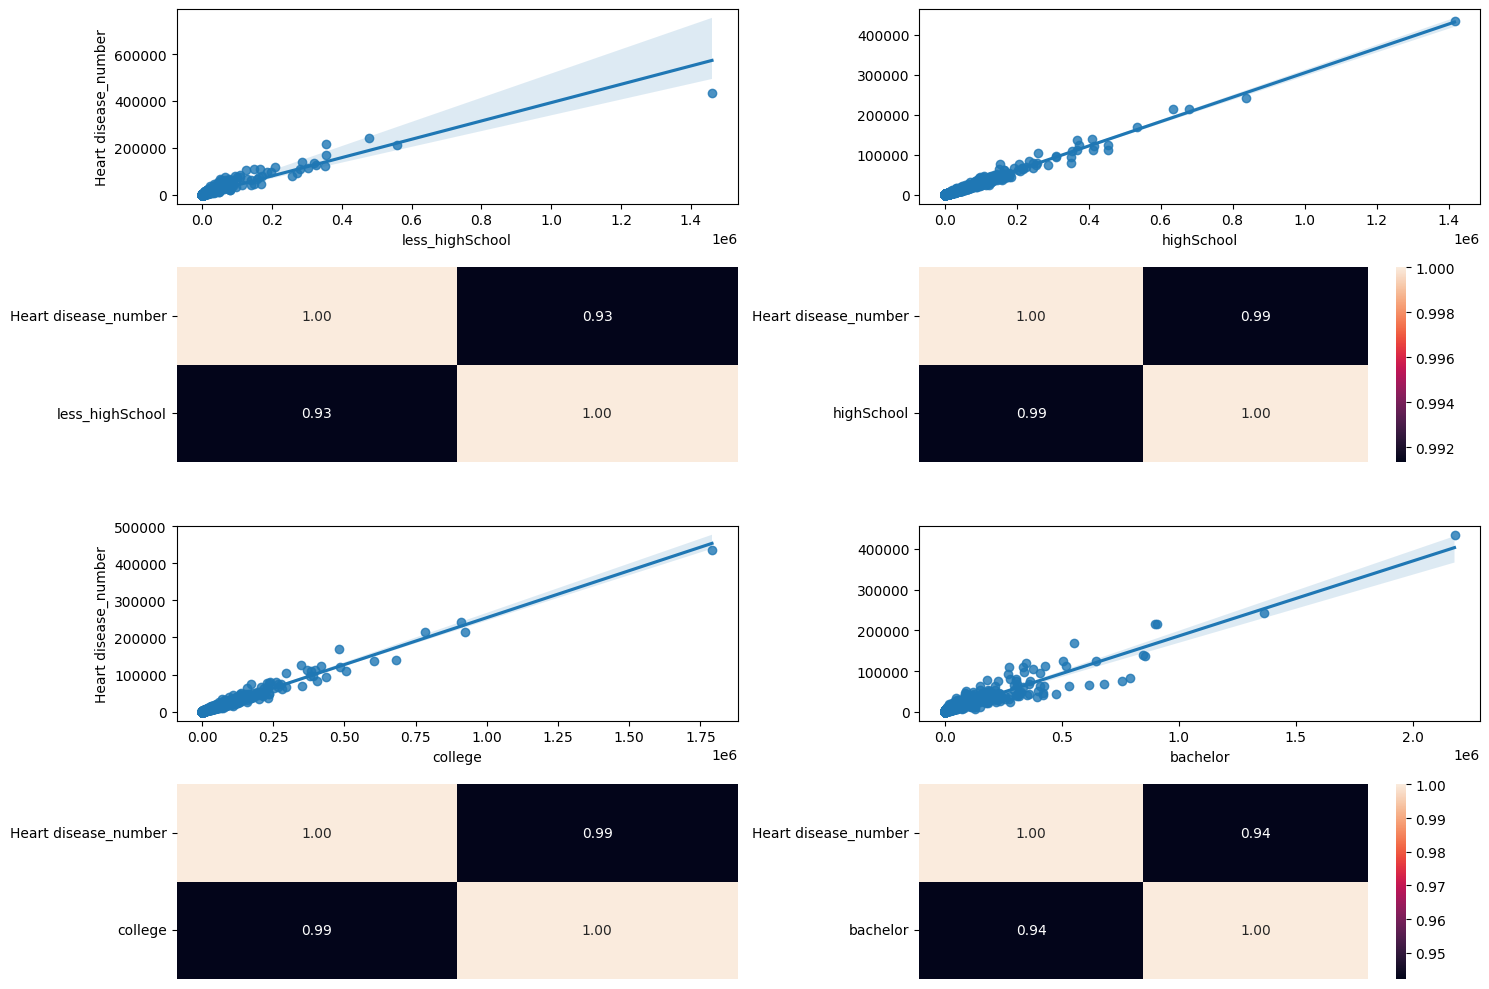

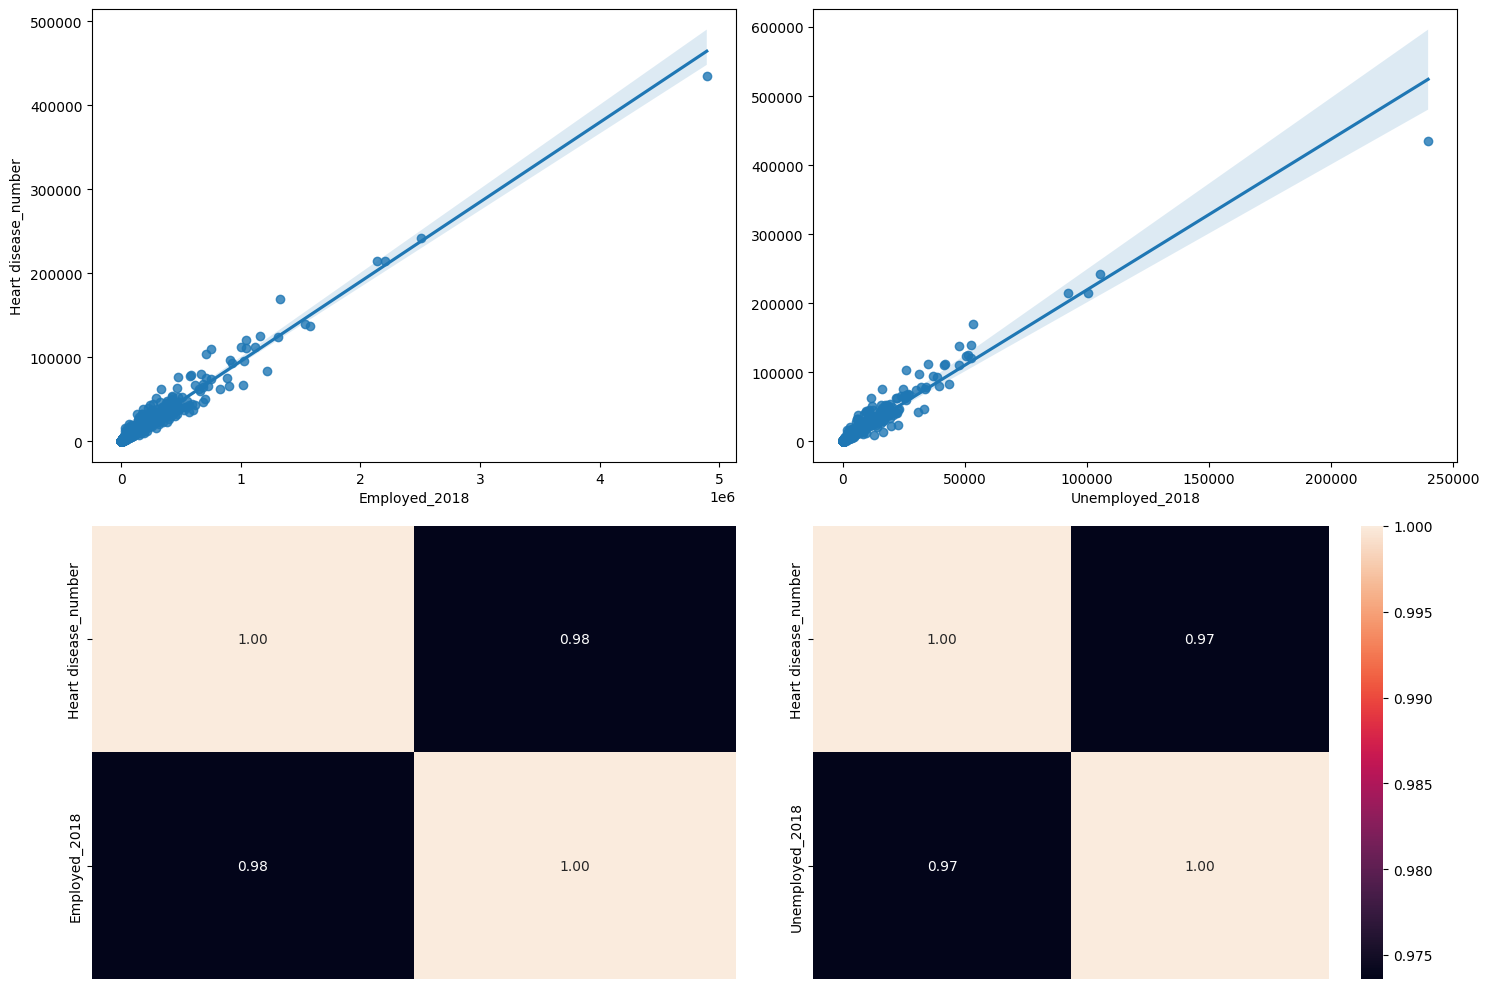

In [11]:
etnic_list = ["caucasian", "afrodescendant", "american-native", "asiatic", "maoli","mixted"]
degree_list = ["less_highSchool", "highSchool", "college", "bachelor"]
employers_list = ["Employed_2018", "Unemployed_2018"]

def NumNumAnalysi(dataset, y, x_list, x_width, y_width):
    #Creamos la figura
    fig, axis = plt.subplots(x_width, y_width, figsize=(15,10))
    x_axis = 0
    y_axis = 0
    for i in range(len(x_list)):
        if (y_axis == 0):
            sns.regplot( ax = axis[x_axis,y_axis], data = dataset, x = x_list[i], y = y)
        else:
            sns.regplot( ax = axis[x_axis,y_axis], data = dataset, x = x_list[i], y = y).set(ylabel = None)

        if (y_axis < y_width - 1):
            sns.heatmap( data[[y,x_list[i]]].corr(), annot=True, fmt=".2f", ax = axis[x_axis + 1, y_axis], cbar=False, xticklabels = False)
        else:
            sns.heatmap( data[[y,x_list[i]]].corr(), annot = True, fmt = ".2f", ax = axis[x_axis + 1, y_axis], xticklabels = False) 
        
        y_axis = y_axis + 1
        if (y_axis == y_width):
            y_axis = 0
            x_axis = x_axis + 2
    
    plt.tight_layout()
    plt.show()

NumNumAnalysi(data, "Heart disease_number", etnic_list, 4, 3)
NumNumAnalysi(data, "Heart disease_number", degree_list, 4, 2)
NumNumAnalysi(data, "Heart disease_number", employers_list, 2, 2)



##### CONCLUSIONES:

- Comprobamos que las enfermedades están fuertemente relacionadas con la étnia y el nivel de educación.

##### Analisis Categórico/Categórico

In [12]:
#Analisis numérico/categorico

#def CatCatAnalysi(dataset):
    #Creamos la figura
    #fig, axis = plt.subplots(1, 3, figsize=(15,5))

    #Creamos las graficas.
    #sns.countplot(ax = axis[0], data = dataset, x = "smoker", hue = "sex")
    #sns.countplot(ax = axis[1], data = dataset, x = "region", hue="sex")
    #sns.countplot(ax = axis[2], data = dataset, x = "region", hue="smoker")


    #plt.tight_layout()
    #plt.show()

#CatCatAnalysi(data)

##### CONCLUSIONES:

-En este caso no hacemos analisis categorico/categórico

##### Combinación Target / Predictors

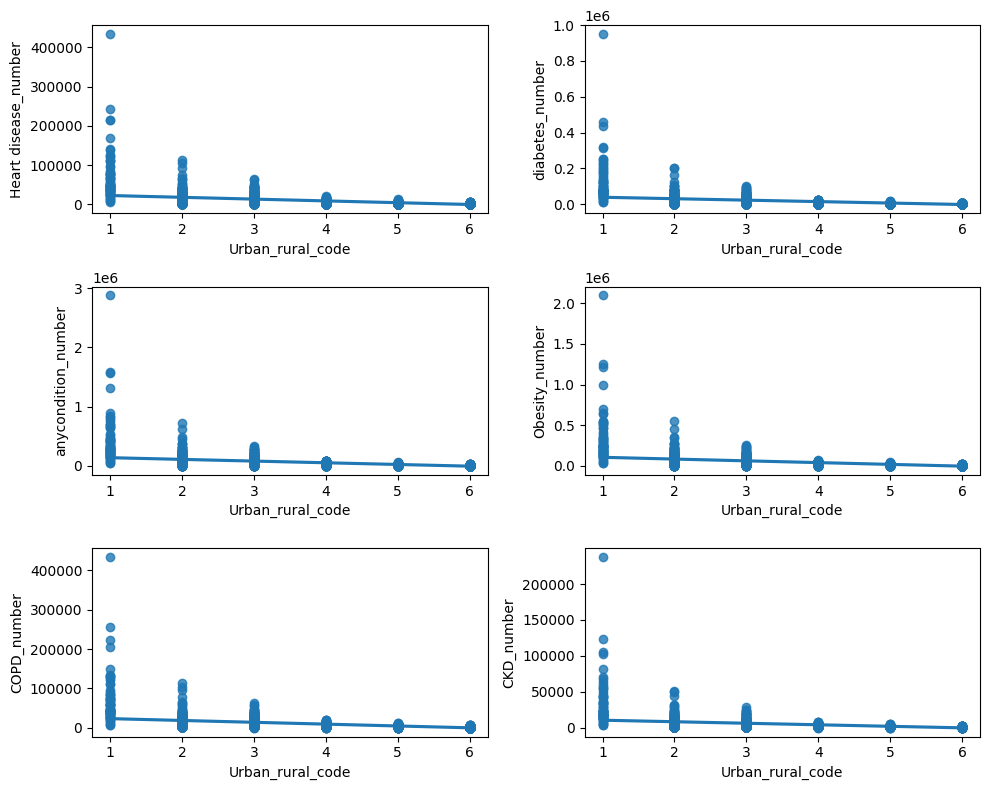

In [13]:
#Combinación Target/Pred

def CombTargPred(dataset):
    
    fig, axis = plt.subplots(3, 2, figsize = (10, 8))

    sns.regplot(ax = axis[0,0], data = dataset, x = "Urban_rural_code", y = "Heart disease_number")
    sns.regplot(ax = axis[0,1], data = dataset, x = "Urban_rural_code", y = "diabetes_number")
    sns.regplot(ax = axis[1,0], data = dataset, x = "Urban_rural_code", y = "anycondition_number")
    sns.regplot(ax = axis[1,1], data = dataset, x = "Urban_rural_code", y = "Obesity_number")
    sns.regplot(ax = axis[2,0], data = dataset, x = "Urban_rural_code", y = "COPD_number")
    sns.regplot(ax = axis[2,1], data = dataset, x = "Urban_rural_code", y = "CKD_number")
    

    plt.tight_layout()
    plt.show()

CombTargPred(data)

#### CONCLUSIONES:

### Creamos la tabla de correlaciones

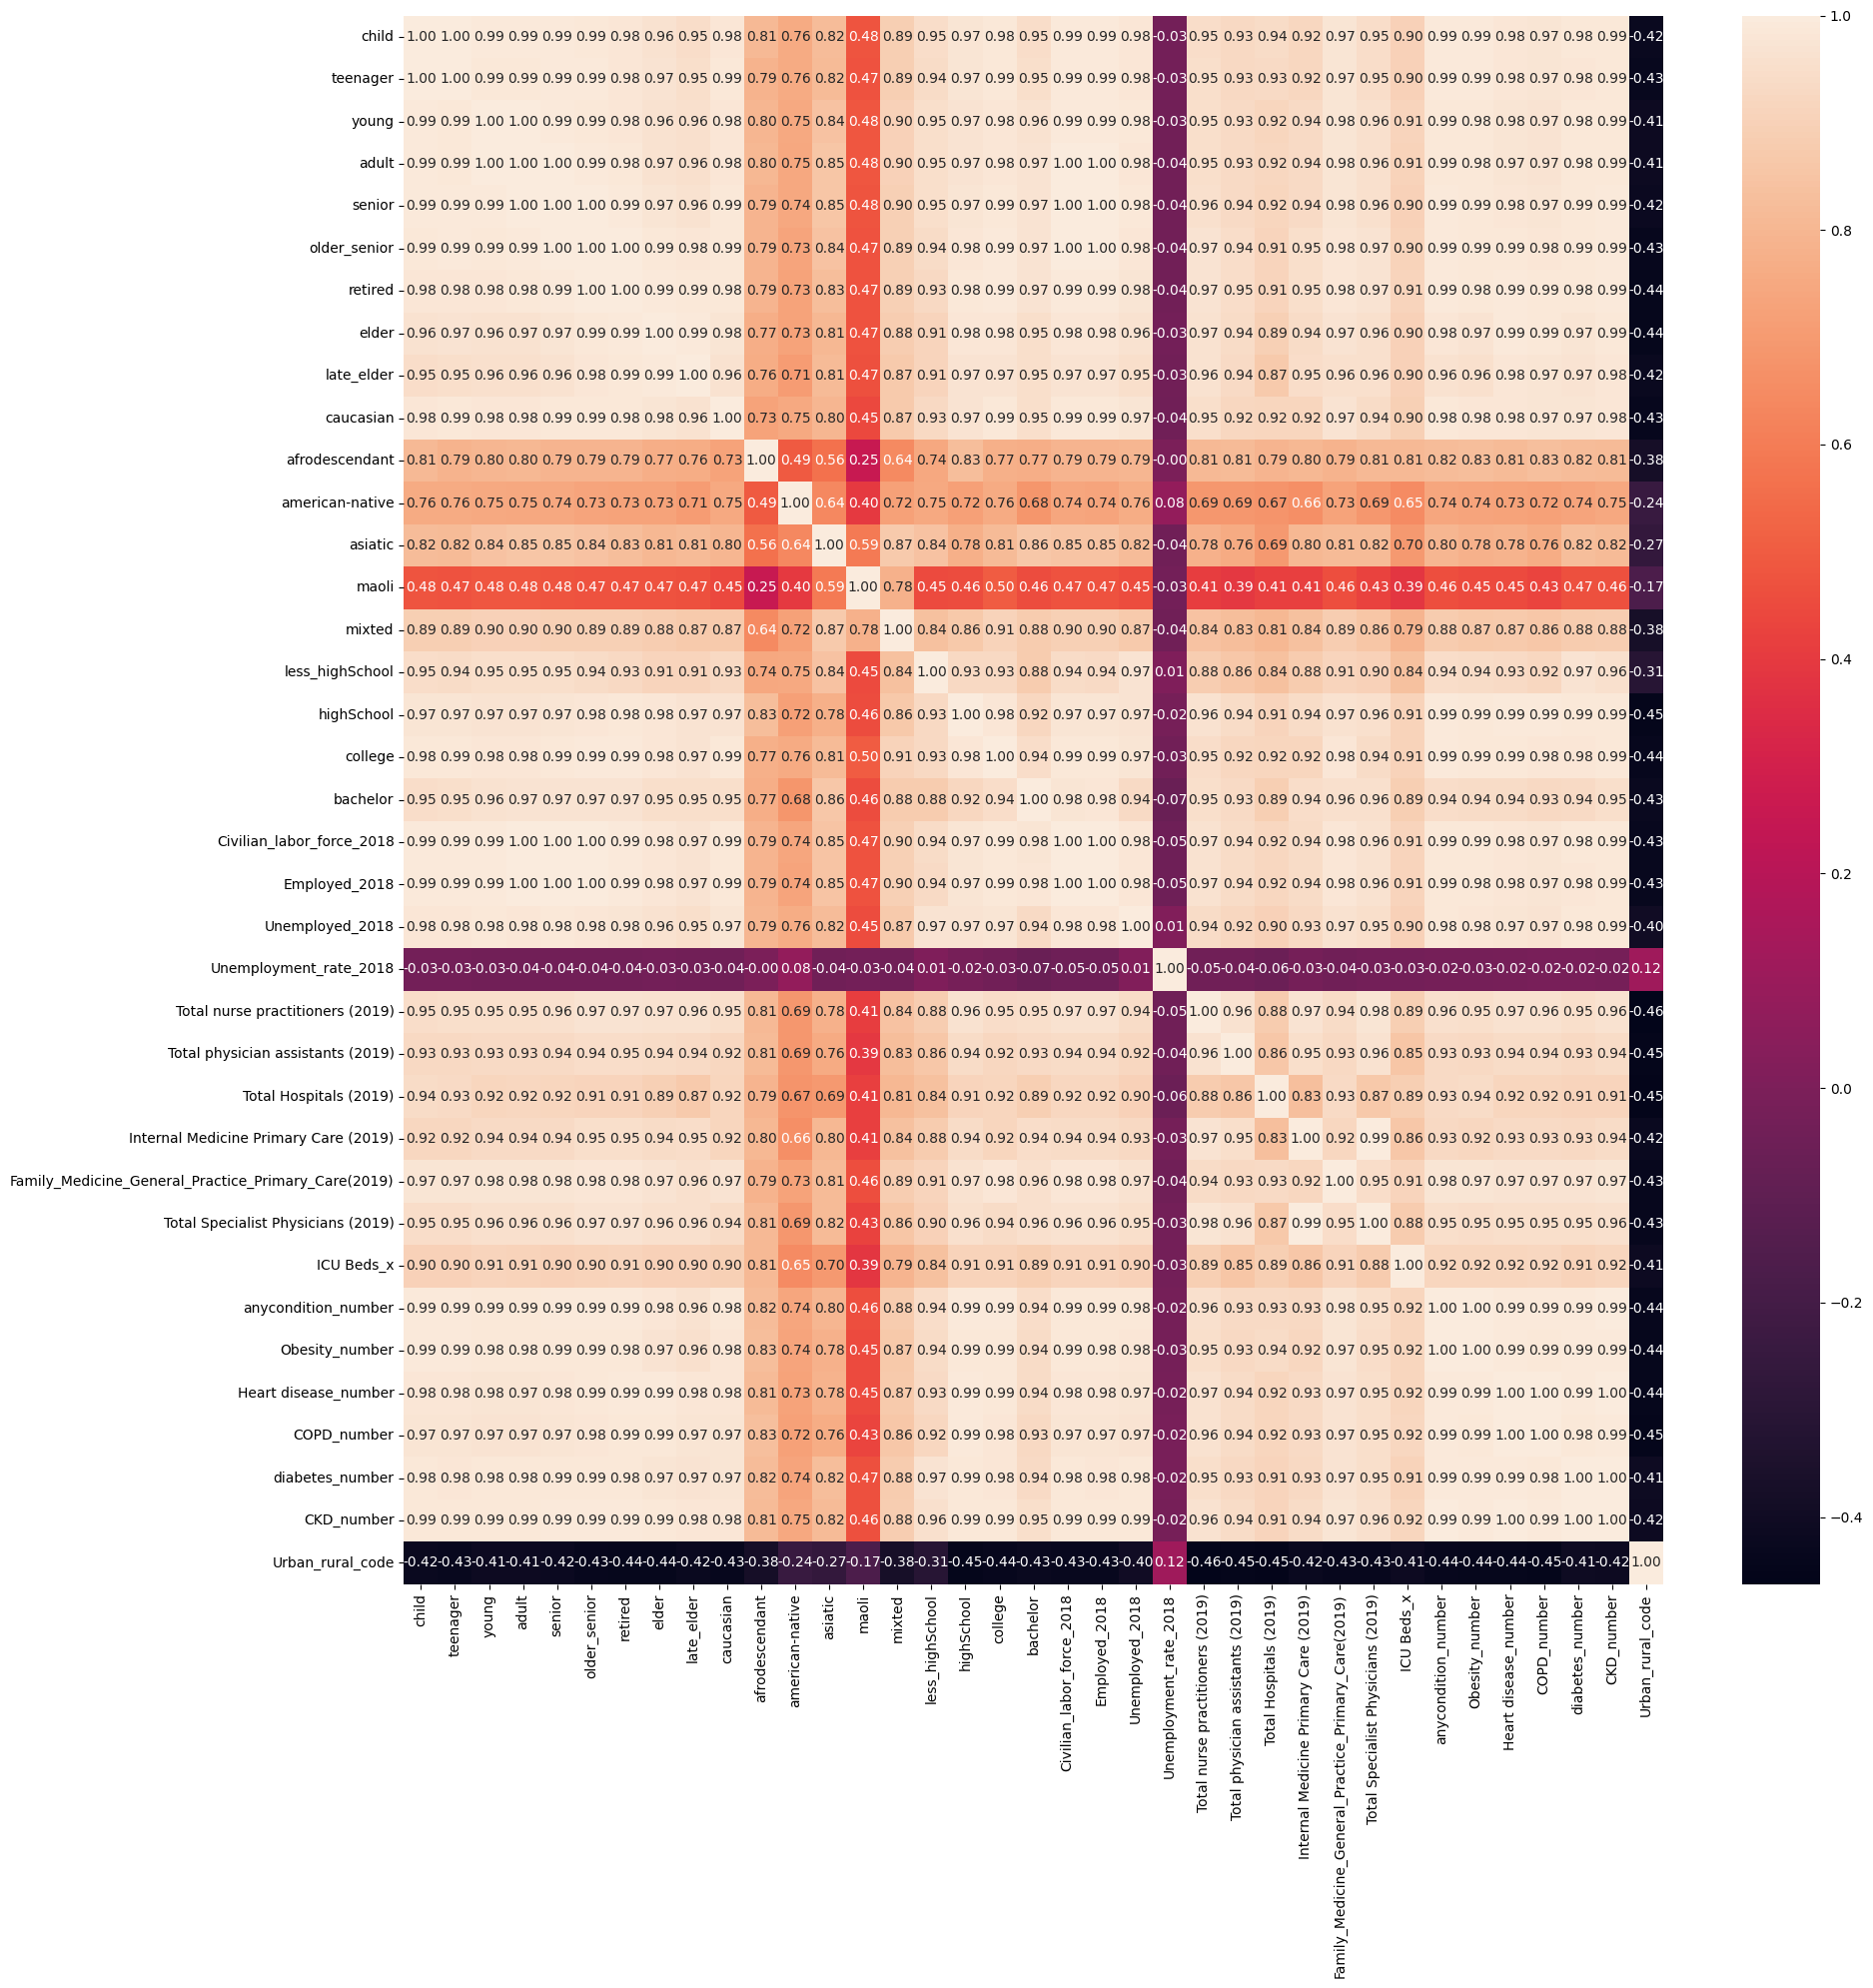

In [14]:
#Tabla de correlaciones
fig, axis = plt.subplots(figsize=(20,20))

sns.heatmap(data.corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

In [15]:
#sns.pairplot(data)

# PASO 5: ingeniería de características.

- Analisis de Outliers

In [16]:
# Comprobamos las metricas de la tabla.

data.describe()

,child,teenager,young,adult,senior,older_senior,retired,elder,late_elder,caucasian,...,Family_Medicine_General_Practice_Primary_Care(2019),Total Specialist Physicians (2019),ICU Beds_x,anycondition_number,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
count,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3.140000e+03,...,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.274030e+04,1.336798e+04,1.446933e+04,1.391649e+04,1.288521e+04,1.363803e+04,1.191621e+04,7220.310510,4035.541720,7.965979e+04,...,44.393892,167.332629,23.817516,3.338540e+04,2.527613e+04,5597.593312,5827.242357,9326.577707,2466.234076,4.635350
std,4.180730e+04,4.228439e+04,4.957773e+04,4.899095e+04,4.347219e+04,4.272063e+04,3.451858e+04,20287.498429,12063.782251,2.372880e+05,...,133.348667,543.035916,84.602028,9.888669e+04,7.446684e+04,15615.285499,15720.551934,29754.601185,7730.422067,1.510447
min,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,4.000000e+00,1.400000e+01,2.000000e+01,6.000000,0.000000,2.400000e+01,...,0.030356,0.111759,0.000000,4.100000e+01,2.500000e+01,7.000000,7.000000,11.000000,3.000000,1.000000
25%,1.280500e+03,1.374500e+03,1.263750e+03,1.232750e+03,1.245250e+03,1.483000e+03,1.476500e+03,950.750000,533.000000,9.008750e+03,...,5.312558,14.740077,0.000000,4.215000e+03,3.075000e+03,798.500000,815.000000,1187.750000,314.750000,3.000000
50%,3.057000e+03,3.274000e+03,3.108000e+03,3.000500e+03,3.048500e+03,3.515500e+03,3.410000e+03,2177.000000,1160.000000,2.206900e+04,...,12.153987,36.223582,0.000000,9.753000e+03,7.182500e+03,1814.500000,1963.500000,2743.000000,718.000000,5.000000
75%,8.097000e+03,8.822250e+03,8.976250e+03,8.314250e+03,8.120500e+03,9.157250e+03,8.710500e+03,5574.000000,2899.750000,5.898575e+04,...,31.312501,103.869345,12.000000,2.500125e+04,1.854250e+04,4376.000000,4727.000000,6679.250000,1776.250000,6.000000
max,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,356275.000000,7.151444e+06,...,3882.586846,15014.048660,2126.000000,2.877316e+06,2.097906e+06,434790.000000,434075.000000,952335.000000,237766.000000,6.000000


- Solamente viendo la diferencia entre el iqr 75 y el max vemos que en este dataset hay una gran cantidad de outliers en todos los campos numericos.

In [17]:
target = "Heart disease_number"

#Creamos una funcion para transformar los outliers.

def SplitOutliers(dataset, target):
    
    dataset_with_outliers = dataset.copy()
    
    #Establecemos los limites.
    for i in dataset.columns:
        if (i == target):
            print(f"Target detected: {target}")
            pass
        
        #Esta parte la tengo que mejorar para poder clasificar los campos categoricos
        elif (i == "Urban_rural_code"):
            print(f"Categorical predictor: Urban_rural_code")
            pass

        else:
            stats = dataset[i].describe()
            iqr = stats["75%"] - stats["25%"]
            upper_limit = float(stats["75%"] + (2 * iqr))
            lower_limit = float(stats["25%"] - (2 * iqr))
            if (lower_limit < 0):
                lower_limit = 0

            #Ajustamos el outlier por encima.
            dataset[i] = dataset[i].apply(lambda x : upper_limit if (x > upper_limit) else x)

            #Ajustamos el outlier por debajo.
            dataset[i] = dataset[i].apply(lambda x : lower_limit if (x < lower_limit) else x)

            #Guardamos los límites en un json.
            with open (f"../data/interim/outerliers_{i}.json", "w") as j:
                json.dump({"upper_limit" : upper_limit, "lower_limit" : lower_limit}, j)
    
    return dataset_with_outliers, dataset

data_with_outliers, data_without_outliers = SplitOutliers (data, target)

Target detected: Heart disease_number
Categorical predictor: Urban_rural_code


- Analisis de valores faltantes.

In [18]:
#Comprobamos si existen valores faltantes.

data_with_outliers.isna().sum().sort_values()

child                                                  0
teenager                                               0
young                                                  0
adult                                                  0
senior                                                 0
older_senior                                           0
retired                                                0
elder                                                  0
late_elder                                             0
caucasian                                              0
afrodescendant                                         0
american-native                                        0
asiatic                                                0
maoli                                                  0
mixted                                                 0
less_highSchool                                        0
highSchool                                             0
college                        

In [19]:
data_without_outliers.isna().sum().sort_values()

child                                                  0
teenager                                               0
young                                                  0
adult                                                  0
senior                                                 0
older_senior                                           0
retired                                                0
elder                                                  0
late_elder                                             0
caucasian                                              0
afrodescendant                                         0
american-native                                        0
asiatic                                                0
maoli                                                  0
mixted                                                 0
less_highSchool                                        0
highSchool                                             0
college                        

En este caso no hay valores faltantes

- Inferencia de Nuevas características.

In [20]:
#Inferencias de nuevas características.

En este caso no veo razones para crear nuevas características.

- Escalado de Valores

In [21]:
# Primero dividimos los dataframes entre test y train

def SplitData(dataset, target):
    #Aislamos el target
    features = []
    for i in dataset.columns:
        if (i == target):
            pass
        else:
            features.append(i)
    
    x = dataset.drop(target, axis = 1)[features]
    y = dataset[target].squeeze()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

    return x_train, x_test, y_train, y_test

x_train_with_outliers, x_test_with_outliers, y_train, y_test = SplitData(data_with_outliers, target)
x_train_without_outliers, x_test_without_outliers, _, _ = SplitData(data_with_outliers, target)

y_train.to_csv("../data/processed/y_train.csv")
y_test.to_csv("../data/processed/y_test.csv")

In [22]:
#Tenemos que escalar los dataset con Normalizacion y con Escala mM (min-Max)

#Normalizacion
def StandardScaleData(dataset):
    #Aislamos el target
    features = []
    for i in dataset.columns:
        if (i == target):
            pass
        else:
            features.append(i)

    scaler = StandardScaler()
    scaler.fit(dataset)

    x_scaler = scaler.transform(dataset)
    x_scaler = pd.DataFrame(dataset, index = dataset.index, columns = features)
    
    if(dataset is x_train_with_outliers):
        dump(scaler, open("../data/interim/standar_scale_with_outliers.sav", "wb"))

    elif(dataset is x_train_without_outliers):
        dump(scaler, open("../data/interim/standar_scale_without_outliers.sav", "wb"))

    return x_scaler

x_train_with_outliers_standarscale = StandardScaleData(x_train_with_outliers)
x_train_without_outliers_standarscale = StandardScaleData(x_train_without_outliers)
x_test_with_outliers_standscale = StandardScaleData(x_test_with_outliers)
x_test_without_outliers_standscale = StandardScaleData(x_test_without_outliers)

In [23]:
#Escala mM
def MinMaxScaleData(dataset):
    #Aislamos el target
    features = []
    for i in dataset.columns:
        if (i == target):
            pass
        else:
            features.append(i)

    scaler = MinMaxScaler()
    scaler.fit(dataset)

    x_scaler = scaler.transform(dataset)
    x_scaler = pd.DataFrame(dataset, index = dataset.index, columns = features)

    if(dataset is x_train_with_outliers):
        dump(scaler, open("../data/interim/min-Max_Scale_with_outliers.sav", "wb"))

    elif(dataset is x_train_without_outliers):
        dump(scaler, open("../data/interim/min-Max_Scale_without_outliers.sav", "wb"))

    return x_scaler

x_train_with_outliers_mMScaler = MinMaxScaleData(x_train_with_outliers)
x_train_without_outliers_mMScaler = MinMaxScaleData(x_train_without_outliers)
x_test_with_outliers_mMScaler = MinMaxScaleData(x_test_with_outliers)
x_test_without_outliers_mMScaler = MinMaxScaleData(x_test_without_outliers)

# PASO 6: Selección de caracteristicas

In [85]:
#Seleccion de caracteristicas
k = 7

def SelectFeatures(dataset, y, filename, k = k):
    sel_model = SelectKBest(f_classif, k=k)
    sel_model.fit(dataset, y)
    col_name = sel_model.get_support()
    x_sel = pd.DataFrame(sel_model.transform(dataset), columns = dataset.columns.values[col_name])
    dump(sel_model, open(f"../data/interim/{filename}.sav", "wb"))
    return x_sel


In [86]:
#Dataset sin normalizacion
x_train_sel_with_outliers = SelectFeatures(x_train_with_outliers, y_train, "x_train_with_outliers")
x_test_sel_with_outliers = SelectFeatures(x_test_with_outliers, y_test, "x_test_with_outliers")
x_train_sel_without_outliers = SelectFeatures(x_train_without_outliers, y_train, "x_train_without_outliers")
x_test_sel_without_outliers = SelectFeatures(x_test_without_outliers, y_test, "x_test_without_outliers")

#Dataset Normalizado
x_train_sel_with_outliers_standarscale = SelectFeatures(x_train_with_outliers_standarscale, y_train, "x_train_with_outliers_standarscale")
x_test_sel_with_outliers_standarscale = SelectFeatures(x_test_with_outliers_standscale, y_test, "x_test_with_outliers_standscale")
x_train_sel_without_outliers_standarscale = SelectFeatures(x_train_without_outliers_standarscale, y_train, "x_train_sel_without_outliers_standarscale")
x_test_sel_without_outliers_standarscale = SelectFeatures(x_test_without_outliers_standscale, y_test, "x_test_without_outliers_standscale")

#Dataset Escalado min-Max
x_train_sel_with_outliers_mMScale = SelectFeatures(x_train_with_outliers_mMScaler, y_train, "x_test_with_outliers_mMScaler")
x_test_sel_with_outliers_mMScale = SelectFeatures(x_test_with_outliers_mMScaler, y_test, "x_test_with_outliers_mMScaler")
x_train_sel_without_outliers_mMScale = SelectFeatures(x_train_without_outliers_mMScaler, y_train, "x_train_without_outliers_mMScaler")
x_test_sel_without_outliers_mMScale = SelectFeatures(x_test_with_outliers_mMScaler, y_test, "x_test_with_outliers_mMScaler")

x_train_sel_with_outliers

,elder,asiatic,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,2460.0,89.0,10213.0,7930.0,2314.0,2823.0,771.0
1,4801.0,231.0,19282.0,13713.0,4097.0,5416.0,1454.0
2,2713.0,394.0,14283.0,10238.0,2792.0,3698.0,871.0
3,6736.0,1370.0,33057.0,25735.0,5716.0,7913.0,2118.0
4,10074.0,4026.0,49754.0,38882.0,10002.0,12987.0,3490.0
...,...,...,...,...,...,...,...
2507,2641.0,532.0,12731.0,11018.0,1914.0,2699.0,838.0
2508,2919.0,733.0,20561.0,15595.0,3631.0,4670.0,1094.0
2509,2322.0,170.0,13265.0,9776.0,3111.0,3999.0,1013.0
2510,938.0,39.0,2660.0,1836.0,661.0,816.0,229.0


In [87]:
#Para acabar nos guardamos los datasets en un csv

def DataToCsv(dataset, filename):
    return dataset.to_csv(f"../data/processed/{filename}.csv")

DataToCsv(x_train_sel_with_outliers, "x_train_sel_with_outliers")
DataToCsv(x_test_sel_with_outliers, "x_test_sel_with_outliers")
DataToCsv(x_train_sel_without_outliers, "x_train_sel_without_outliers")
DataToCsv(x_test_sel_without_outliers, "x_test_sel_without_outliers")
DataToCsv(x_train_sel_with_outliers_standarscale, "x_train_sel_with_outliers_standarscale")
DataToCsv(x_test_sel_with_outliers_standarscale, "x_test_sel_with_outliers_standarscale")
DataToCsv(x_train_sel_without_outliers_standarscale, "x_train_sel_without_outliers_standarscale")
DataToCsv(x_test_sel_without_outliers_standarscale, "x_test_sel_without_outliers_standarscale")
DataToCsv(x_train_sel_with_outliers_mMScale, "x_train_sel_with_outliers_mMScale")
DataToCsv(x_test_sel_with_outliers_mMScale, "x_test_sel_with_outliers_mMScale")
DataToCsv(x_train_sel_without_outliers_mMScale, "x_train_sel_without_outliers_mMScale")
DataToCsv(x_test_sel_without_outliers_mMScale, "x_test_sel_without_outliers_mMScale")

y_test

2893      698
2968    13982
1064     1768
1231     6739
2987    11305
        ...  
1351     1432
670       375
2283     2794
2482     6579
2650     2486
Name: Heart disease_number, Length: 628, dtype: int64

# ESTO YA NO ES PARTE DEL EDA

# Machine Learning

In [88]:
traindfs = [ x_train_sel_with_outliers_standarscale, x_train_sel_without_outliers_standarscale, x_train_sel_with_outliers_mMScale, x_train_sel_without_outliers_mMScale]
testdfs = [ x_test_sel_with_outliers_standarscale, x_test_sel_without_outliers_standarscale, x_test_sel_with_outliers_mMScale, x_test_sel_without_outliers_mMScale]

In [89]:
def LinealRegresion (traindataset, testdataset):
    results = []
    models = []
    parameters = []

    for i in range(len(traindataset)):
        model = LinearRegression()
        traindf = traindataset[i]

        model.fit(traindf, y_train)
        y_train_predict = model.predict(traindf)
        y_test_predict = model.predict(testdataset[i])

        parameters.append({"Intercepter (a)" : float(model.intercept_), "Coeficient (b1 ~ b5)" : list(model.coef_)})
        result = {"index:" : i, "Parameters_train" : {"MSE" : float(mean_squared_error(y_train, y_train_predict)), "R2" : r2_score(y_train, y_train_predict)}, "Parameters_test" : {"MSE" : float(mean_squared_error(y_test, y_test_predict)), "R2" : r2_score(y_test, y_test_predict)}}
        results.append(result)
        models.append(model)

    with open ("../data/processed/lineal_regresion_parameters.json", "w") as j:
        json.dump( parameters, j)

    return results, models

lr_results, lr_models = LinealRegresion(traindfs, testdfs)

lr_results

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- highSchool
- maoli
Feature names seen at fit time, yet now missing:
- Obesity_number
- elder


#### Conclusiones

el modelo es completamente inutil.

In [42]:
def LinealRegressionTrain(traindata, testdata):
    result = []
    models = []
    parameters = []
    for i in range(len(traindata)):
       model = LinearRegression()
       traindf = traindata[i]

    return traindf

LinealRegressionTrain(traindfs, testdfs)

,elder,asiatic,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,2460.0,89.0,10213.0,7930.0,2314.0,2823.0,771.0
1,4801.0,231.0,19282.0,13713.0,4097.0,5416.0,1454.0
2,2713.0,394.0,14283.0,10238.0,2792.0,3698.0,871.0
3,6736.0,1370.0,33057.0,25735.0,5716.0,7913.0,2118.0
4,10074.0,4026.0,49754.0,38882.0,10002.0,12987.0,3490.0
...,...,...,...,...,...,...,...
2507,2641.0,532.0,12731.0,11018.0,1914.0,2699.0,838.0
2508,2919.0,733.0,20561.0,15595.0,3631.0,4670.0,1094.0
2509,2322.0,170.0,13265.0,9776.0,3111.0,3999.0,1013.0
2510,938.0,39.0,2660.0,1836.0,661.0,816.0,229.0


In [29]:
def LinealRegresionLasso (traindataset, testdataset):
    results = []
    models = []
    parameters = []

    for i in range(len(traindataset)):
        model = Lasso()
        traindf = traindataset[i]

        model.fit(traindf, y_train)
        y_train_predict = model.predict(traindf)
        y_test_predict = model.predict(testdataset[i])

        parameters.append({"Intercepter (a)" : float(model.intercept_), "Coeficient (b1 ~ b5)" : list(model.coef_)})
        result = {"index:" : i, "Parameters_train" : {"MSE" : float(mean_squared_error(y_train, y_train_predict)), "R2" : r2_score(y_train, y_train_predict)}, "Parameters_test" : {"MSE" : float(mean_squared_error(y_test, y_test_predict)), "R2" : r2_score(y_test, y_test_predict)}}
        results.append(result)
        models.append(model)

    with open ("../data/processed/lasso_parameters.json", "w") as j:
        json.dump( parameters, j)

    return results, models

lasso_results, lasso_models = LinealRegresionLasso(traindfs, testdfs)

lasso_results

c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.306e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- highSchool
- maoli
Feature names seen at fit time, yet now missing:
- Obesity_number
- elder


In [ ]:
def LinealRegresionRidge (traindataset, testdataset):
    results = []
    models = []
    parameters = []

    for i in range(len(traindataset)):
        model = Ridge()
        traindf = traindataset[i]

        model.fit(traindf, y_train)
        y_train_predict = model.predict(traindf)
        y_test_predict = model.predict(testdataset[i])

        parameters.append({"Intercepter (a)" : float(model.intercept_), "Coeficient (b1 ~ b5)" : list(model.coef_)})
        result = {"index:" : i, "Parameters_train" : {"MSE" : float(mean_squared_error(y_train, y_train_predict)), "R2" : r2_score(y_train, y_train_predict)}, "Parameters_test" : {"MSE" : float(mean_squared_error(y_test, y_test_predict)), "R2" : r2_score(y_test, y_test_predict)}}
        results.append(result)
        models.append(model)

    with open ("../data/processed/ridge_parameters.json", "w") as j:
        json.dump( parameters, j)

    return results, models

ridge_results, ridge_models = LinealRegresionRidge(traindfs, testdfs)

ridge_results

[{'index:': 0,
  'Parameters_train': {'MSE': 193439780.06043032, 'R2': 0.3153102937360228},
  'Parameters_test': {'MSE': 41285768.71430061, 'R2': 0.5282999860586555}},
 {'index:': 1,
  'Parameters_train': {'MSE': 193439780.06043032, 'R2': 0.3153102937360228},
  'Parameters_test': {'MSE': 41285768.71430061, 'R2': 0.5282999860586555}},
 {'index:': 2,
  'Parameters_train': {'MSE': 193439780.06043032, 'R2': 0.3153102937360228},
  'Parameters_test': {'MSE': 41285768.71430061, 'R2': 0.5282999860586555}},
 {'index:': 3,
  'Parameters_train': {'MSE': 193439780.06043032, 'R2': 0.3153102937360228},
  'Parameters_test': {'MSE': 41285768.71430061, 'R2': 0.5282999860586555}}]

In [ ]:
def LinealRegresionElasticCV (traindataset, testdataset):
    results = []
    models = []
    parameters = []

    for i in range(len(traindataset)):
        model = ElasticNetCV()
        traindf = traindataset[i]

        model.fit(traindf, y_train)
        y_train_predict = model.predict(traindf)
        y_test_predict = model.predict(testdataset[i])

        parameters.append({"Intercepter (a)" : float(model.intercept_), "Coeficient (b1 ~ b5)" : list(model.coef_)})
        result = {"index:" : i, "Parameters_train" : {"MSE" : float(mean_squared_error(y_train, y_train_predict)), "R2" : r2_score(y_train, y_train_predict)}, "Parameters_test" : {"MSE" : float(mean_squared_error(y_test, y_test_predict)), "R2" : r2_score(y_test, y_test_predict)}}
        results.append(result)
        models.append(model)

    with open ("../data/processed/elasticnetcv_parameters.json", "w") as j:
        json.dump( parameters, j)

    return results, models

encv_results, encv_models = LinealRegresionElasticCV(traindfs, testdfs)

encv_results

[{'index:': 0,
  'Parameters_train': {'MSE': 195033313.3822074, 'R2': 0.30966990342091516},
  'Parameters_test': {'MSE': 40775424.80840311, 'R2': 0.5341307901110781}},
 {'index:': 1,
  'Parameters_train': {'MSE': 195033313.3822074, 'R2': 0.30966990342091516},
  'Parameters_test': {'MSE': 40775424.80840311, 'R2': 0.5341307901110781}},
 {'index:': 2,
  'Parameters_train': {'MSE': 195033313.3822074, 'R2': 0.30966990342091516},
  'Parameters_test': {'MSE': 40775424.80840311, 'R2': 0.5341307901110781}},
 {'index:': 3,
  'Parameters_train': {'MSE': 195033313.3822074, 'R2': 0.30966990342091516},
  'Parameters_test': {'MSE': 40775424.80840311, 'R2': 0.5341307901110781}}]